<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Dataquest_Guided_Project_Clean_Analyze_Employee_Exit_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Limpeza e Análise de Dados de Pesquisas de Saída de Funcionários da Educação

O objetivo desse notebook é aplicar técnicas de combinação, limpeza e análise de dados sob um determinado tema. E dessa vez a proposta da plataforma Dataquest é analisar pesquisas de satisfação de funcionários que saíram de dois departamentos governamentais em Queensland na Austrália ligados Educação:

* Department of Education, Training and Employment (DETE)
* Technical and Further Education (TAFE)

Os dados estão disponíveis no site do governo australiano:

* [DETE Dataset](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
* [TAFE Dataset](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

Perguntas a serem respondidas sobre os dados:
* Os funcionários que trabalharam pouco tempo nas instituições saíram devido à alguma insatisfação? 
* E os funcionários que trabalharam por muito tempo?

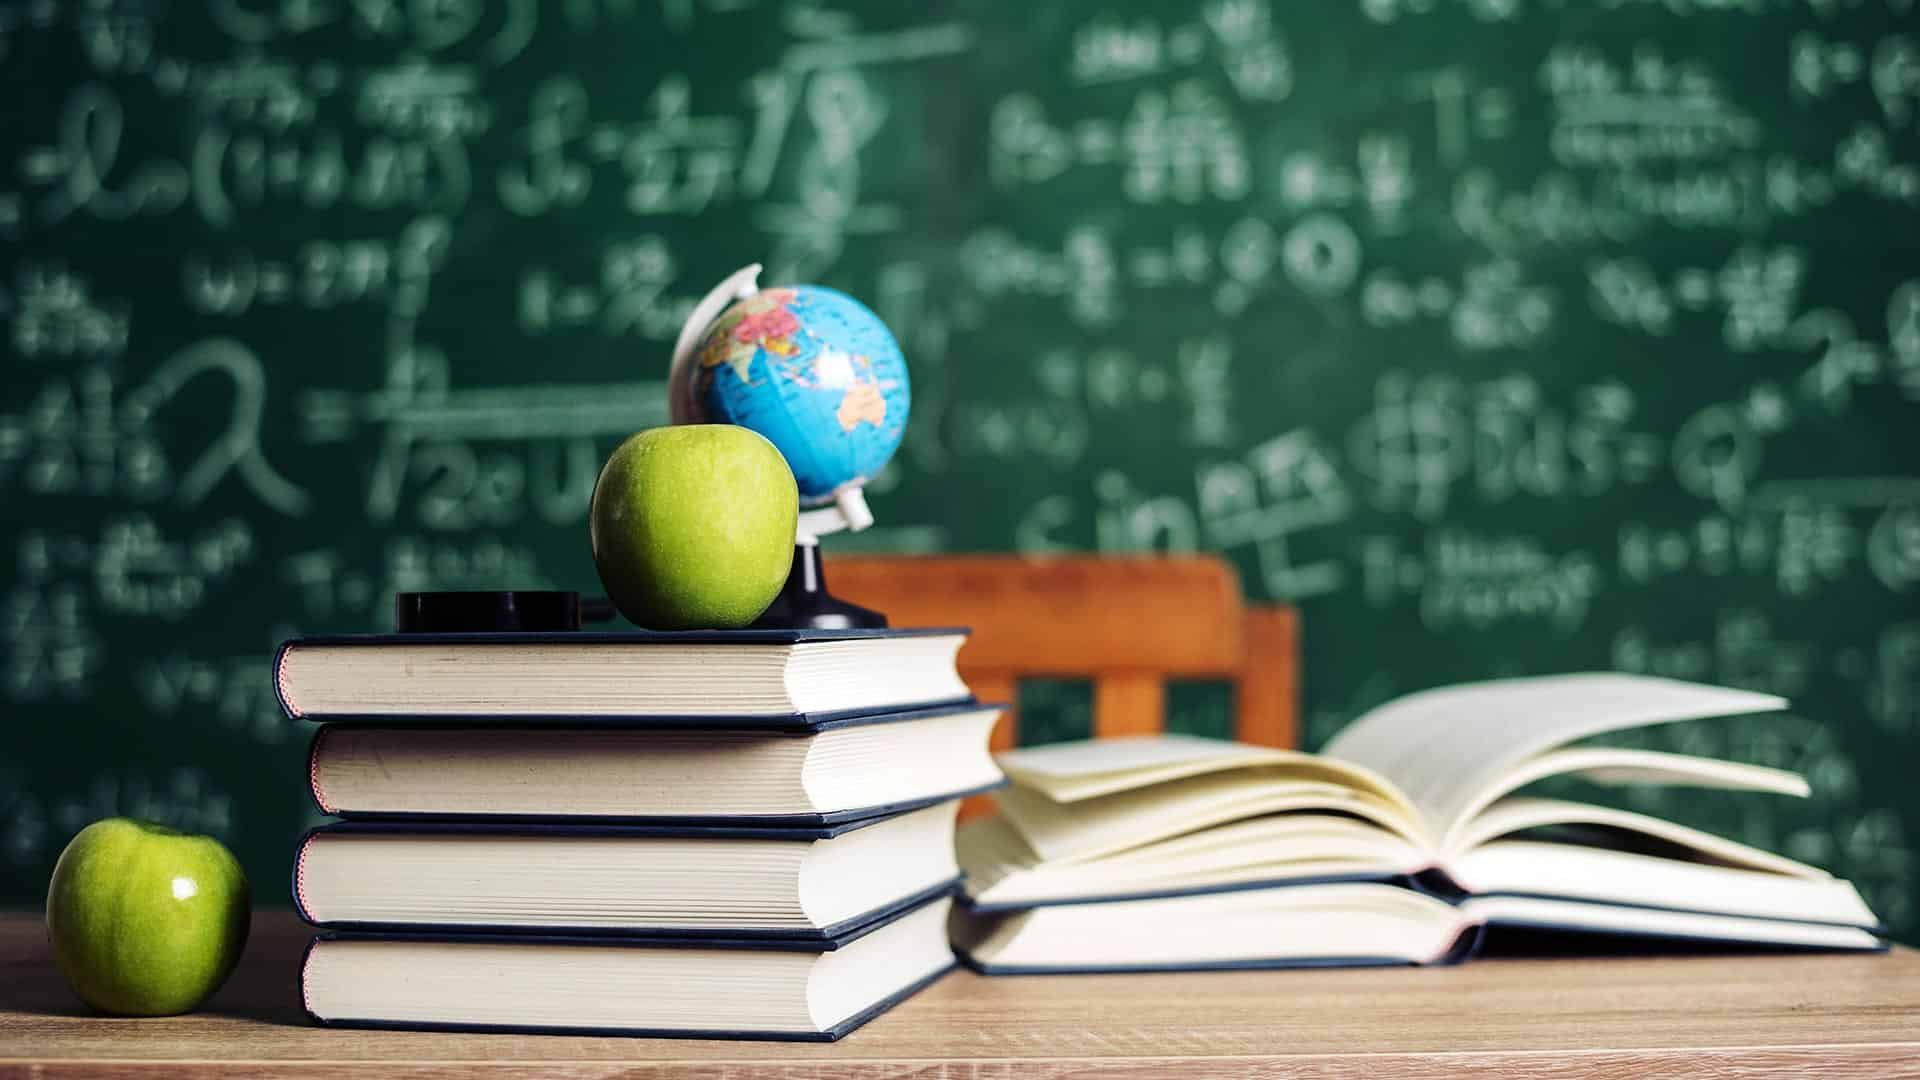

##Dicionário dos dados a serem utilizados
Segue abaixo as informações de alguns campos que foram fornecidos.

**DETE Dataset**

| Campo | Descrição|
|-------|-----------|
| ID| Identificador do participante da pesquisa |
|SeparationType| Motivo pelo qual o participante saiu|
|Cease Date| O Ano ou mês que o participante saiu|
|DETE Start Date| Ano que o participante iniciou na DETE|

**TAFE Dataset**

| Campo | Descrição|
|-------|-----------|
| Record ID| Identificador do participante da pesquisa |
|Reason for ceasing employment| Motivo pelo qual o participante saiu|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)| O tempo de trabalho do participante (em anos)|



**Importando dados do DETE**

In [ ]:
#importando biblioteca para ler dados
import pandas as pd

In [ ]:
#importando os dados para um dataframe
dete_df = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv')
#selecionando amostra
dete_df.sample(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
773,775,Age Retirement,Not Stated,2006,2006,Public Servant,A01-A04,Metropolitan,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,NaN,N,N,A,A,N,N,N,N,N,N,D,D,D,N,N,N,N,D,D,Male,61 or older,NaN,NaN,NaN,NaN,NaN
699,701,Age Retirement,Not Stated,2006,2006,Schools Officer,NaN,Metropolitan,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,M,N,N,A,A,N,N,N,N,N,N,D,D,D,N,N,N,N,D,D,Male,61 or older,NaN,NaN,NaN,NaN,NaN
592,593,Resignation-Other reasons,06/2013,2001,2010,Cleaner,NaN,North Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,NaN,A,A,A,A,A,A,A,A,A,NaN,A,A,N,A,A,A,A,N,N,Female,56-60,NaN,NaN,NaN,NaN,NaN
225,226,Age Retirement,2012,1997,1997,Cleaner,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,N,D,N,N,N,N,N,N,N,N,N,D,N,N,N,N,N,N,N,D,D,Female,56-60,NaN,NaN,NaN,NaN,NaN
265,266,Age Retirement,2012,2007,2007,Schools Officer,NaN,Not Stated,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,N,A,A,A,A,A,A,A,SA,A,N,N,A,N,A,SA,A,A,A,SA,Male,61 or older,NaN,NaN,NaN,NaN,NaN
252,253,Age Retirement,2012,2011,2011,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,A,N,N,A,A,N,N,A,A,A,A,N,N,N,N,A,A,A,A,A,A,Male,61 or older,NaN,NaN,NaN,NaN,NaN
447,448,Termination,2012,2010,2010,Public Servant,AO8 and Above,Central Office,Information and Technologies,Temporary Full-time,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,A,A,A,A,A,SA,A,SA,SA,A,SA,SA,A,A,N,N,N,A,Male,31-35,Yes,NaN,NaN,NaN,NaN
749,751,Voluntary Early Retirement (VER),Not Stated,Not Stated,Not Stated,Teacher,Primary,North Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,A,N,D,NaN,A,D,SD,D,D,A,A,D,NaN,A,NaN,A,A,A,A,M,A,Female,51-55,NaN,NaN,NaN,NaN,NaN
221,222,Age Retirement,2012,1977,1988,Teacher,Primary,South East,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,D,N,D,N,D,D,D,A,D,D,A,SD,SD,D,A,D,D,D,SD,A,Female,51-55,NaN,NaN,NaN,NaN,NaN
748,750,Age Retirement,12/2013,1996,1996,Teacher,Special Education,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,A,A,A,A,A,A,A,A,A,A,A,SA,A,A,A,A,A,A,A,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [ ]:
dete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

**Importando dados do TAFE**

In [ ]:
#importando os dados para um dataframe
tafe_df = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/tafe-employee-exit-survey-access-database-december-2013.csv', encoding= 'cp1252')
#selecionando amostra
tafe_df.sample(10)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [ ]:
tafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

**Conferindo campos nulos**

In [ ]:
dete_df.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [ ]:
#alterando o tamanho do resultado exibido para evitar dados ocultados
pd.set_option('display.max_rows', 100)

tafe_df.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

##Seleção e Preparação dos Dados

Com a leitura inicial acima, o primeiro ponto notado é que no dataset dete existem valores *Not Stated* que indica ausência de valor assim como ```NaN```, então vamos ler novamente os dados padronizando esses casos para todos serem tratados igualmente como ```NaN```.

In [ ]:
dete_df = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv', na_values='Not Stated')

Outro ponto é selecionar quais colunas vamos eliminar, pois não vão agregar à nossa análise:

In [ ]:
dete_df_clean = dete_df.drop(dete_df.columns[28:49], axis=1)
dete_df_clean.sample(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
354,355,Resignation-Other employer,2013,2007.0,2007.0,Teacher,Secondary,Metropolitan,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,Male,26-30,NaN,NaN,NaN,NaN,NaN
294,295,Voluntary Early Retirement (VER),2013,1992.0,1992.0,Professional Officer,PO1-PO4,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [ ]:
tafe_df_clean = tafe_df.drop(tafe_df.columns[17:66], axis=1)
tafe_df_clean.sample(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
495,634763735587969000,Central Queensland Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Female,31 – 35,Contract/casual,Administration (AO),Less than 1 year,Less than 1 year
217,634474119730625000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2011.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,21 – 25,Contract/casual,Administration (AO),1-2,Less than 1 year


Como nossa ideia é combinar algumas informações de ambos dataframes, precisamos padronizar o nome das colunas.
O dataset DETE tem nomes mais agradáveis de trabalhar, então apenas foi necessário aplicar letras minúsculas e trocar espaços por underline. Já o TAFE tem nomes maiores no formato de frases longas, então utilizar o método ```rename``` passando um dicionário como de-para serviu melhor.

In [ ]:
dete_df_clean.columns = dete_df_clean.columns.str.lower().str.replace(' ','_')
dete_df_clean.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [ ]:
tafe_columns = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_df_clean = tafe_df_clean.rename(tafe_columns, axis=1)
tafe_df_clean.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

Nosso objetivo é analisar funcionários que saíram por conta própria da empresa, mas os datasets contém vários motivos para a saída do colaborador. Então é necessário realizar um filtro para focar a análise aos dados que vão contribuir para esse objetivo.

Abaixo conferimos quantos resultados temos por tipo de saída.

In [ ]:
dete_df_clean['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [ ]:
tafe_df_clean['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Então filtramos todos os tipos relacionados a "Resignation"

In [ ]:
dete_resignation = dete_df_clean[dete_df_clean['separationtype'].isin(['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate'])].copy()

In [ ]:
tafe_resignation = tafe_df_clean[tafe_df_clean['separationtype'] == 'Resignation'].copy()

E então conferimos se o resultado ficou conforme esperado

In [ ]:
dete_resignation['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [ ]:
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

##Verificação e Limpeza dos Dados

###Tratamento das datas
Começando pelo ano de saída e entrada, vamos investigar algumas inconsistências.

No dataset DETE temos campos do ano de início do trabalho e saída
* portanto não faria sentido o ano de entrada ser maior que o de saída 
* Nem faria sentido ter pessoas que começaram a trabalhar antes de 1940, pois geralmente as pessoas ingressam no mercado de trabalho aos 20 anos e estamos em 2021.

Primeiro convertemos a data do DETE dataset para manter apenas o ano e retirar o mês e barra (exemplo 01/2021 fica 2021 apenas).
Em seguida verificamos se existe alguma data de entrada maior que a saída e notamos que não existe nenhuma inconsistência desse tipo.

In [ ]:
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype('float')

In [ ]:

dete_resignation[dete_resignation['dete_start_date'] > dete_resignation['cease_date']] 

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


Com o ```value_counts``` foi possível conferir a variedade dos anos tanto de início como de encerramento de trabalho, e não parece ter nenhum valor inconsistente.

In [ ]:
dete_resignation['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [ ]:
dete_resignation['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

O dataset TAFE possui uma coluna que renomeamos para ```institute_service``` que representa a quantidade de anos trabalhados, apesar de o dataset DETE não possuir, temos os dados necessários para gerar essa informação.

In [ ]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

In [ ]:
dete_resignation[['institute_service', 'cease_date', 'dete_start_date']]

,institute_service,cease_date,dete_start_date
3,7.0,2012.0,2005.0
5,18.0,2012.0,1994.0
8,3.0,2012.0,2009.0
9,15.0,2012.0,1997.0
11,3.0,2012.0,2009.0
...,...,...,...
808,3.0,2013.0,2010.0
815,2.0,2014.0,2012.0
816,2.0,2014.0,2012.0
819,5.0,2014.0,2009.0


###Tratamento do motivo da saída

Existem vários campos que representam insatisfação do trabalho no dataset DETE, e 2 campos no TAFE. 
Vamos analisar os valores e padronizar melhor a informação para poder analisar.

Basicamente ambos campos do dataset TAFE repetem o nome da própria coluna, podemos converter em True, False e NaN

In [ ]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [ ]:
import numpy as np
#definindo uma função para aplicar nos campos acima
def classify_values(elem):
  if elem == '-':
    return False
  elif pd.isnull(elem):
    return np.nan
  else:
    return True

In [ ]:
tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(classify_values)

Após aplicar o método para reclassificar os dados, usando novamente o ```value_counts``` validamos que as informações permanecem as mesmas, ainda temos 55 e 62 respostas equivalentes à insatisfação.

In [ ]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Agora sim conseguimos compilar tudo em uma única coluna, onde se pelo menos uma delas tiver o valor True significa que a saída foi devido à insatisfação.

In [ ]:
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction',
                                                     'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [ ]:
tafe_resignation[tafe_resignation['dissatisfied']== True][['Contributing Factors. Dissatisfaction',
                                                           'Contributing Factors. Job Dissatisfaction']][:10]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
14,True,True
17,False,True
20,True,True
26,True,True
40,True,False
47,True,False
52,False,True
54,True,False
58,False,True
64,True,False


In [ ]:
tafe_resignation[tafe_resignation['dissatisfied']== False][['Contributing Factors. Dissatisfaction',
                                                            'Contributing Factors. Job Dissatisfaction']][:10]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
15,False,False


Agora vamos aplicar a mesma lógica ao dataset DETE que tem um pouco mais colunas. Mas por outro lado os valores estão prontos para uso como ```False``` e ```True```

In [ ]:
dete_resignation['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [ ]:
dete_resignation['dissatisfaction_with_the_department'].value_counts()

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [ ]:
dete_resignation['physical_work_environment'].value_counts()

False    305
True       6
Name: physical_work_environment, dtype: int64

In [ ]:
dete_resignation['lack_of_recognition'].value_counts()

False    278
True      33
Name: lack_of_recognition, dtype: int64

In [ ]:
dete_resignation['lack_of_job_security'].value_counts()

False    297
True      14
Name: lack_of_job_security, dtype: int64

In [ ]:
dete_resignation['work_location'].value_counts()

False    293
True      18
Name: work_location, dtype: int64

In [ ]:
dete_resignation['employment_conditions'].value_counts()

False    288
True      23
Name: employment_conditions, dtype: int64

In [ ]:
dete_resignation['work_life_balance'].value_counts()

False    243
True      68
Name: work_life_balance, dtype: int64

In [ ]:
dete_resignation['workload'].value_counts()

False    284
True      27
Name: workload, dtype: int64

In [ ]:
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
                                                     'dissatisfaction_with_the_department',
                                                     'physical_work_environment',
                                                     'lack_of_recognition',
                                                     'lack_of_job_security',
                                                     'work_location',
                                                     'employment_conditions',
                                                     'work_life_balance',
                                                     'workload']].any(axis=1, skipna=False)

In [ ]:
dete_resignation[dete_resignation['dissatisfied'] == True][['job_dissatisfaction',
                                                            'dissatisfaction_with_the_department',
                                                            'physical_work_environment',
                                                            'lack_of_recognition',
                                                            'lack_of_job_security',
                                                            'work_location',
                                                            'employment_conditions',
                                                            'work_life_balance',
                                                            'workload']]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
5,False,False,False,False,False,False,True,False,False
9,True,True,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
22,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
786,True,False,False,False,True,False,False,False,False
790,False,False,False,True,False,False,True,False,True
791,False,False,False,True,False,False,False,False,False
807,False,True,False,False,False,False,False,True,False


In [ ]:
dete_resignation[dete_resignation['dissatisfied'] == False][['job_dissatisfaction',
                                                             'dissatisfaction_with_the_department',
                                                             'physical_work_environment',
                                                             'lack_of_recognition',
                                                             'lack_of_job_security',
                                                             'work_location',
                                                             'employment_conditions',
                                                             'work_life_balance',
                                                             'workload']]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
806,False,False,False,False,False,False,False,False,False
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False


##Combinação dos datasets

Para começar a analisar, a melhor forma será combinando os dados, antes vamos identificar os dados para sabermos de qual dataset veio.

In [ ]:
dete_resignation['institute'] = 'DETE'
dete_resignation['institute'][:3]

3    DETE
5    DETE
8    DETE
Name: institute, dtype: object

In [ ]:
tafe_resignation['institute'] = 'TAFE'
tafe_resignation['institute'][:3]

3    TAFE
4    TAFE
5    TAFE
Name: institute, dtype: object

In [ ]:
combined = pd.concat([dete_resignation, tafe_resignation], ignore_index=True)
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,role_service
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,635065973820625000,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-6,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,21 – 25,Temporary Full-time,Operational (OO),5-6
647,635066785175197000,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2,False,TAFE,Barrier Reef Institute of TAFE,Delivery (teaching),Career Move - Public Sector,-,-,-,-,False,False,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2
648,635067716405666000,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Com o ```heatmap``` abaixo podemos ter uma noção dos campos com valores nulos.

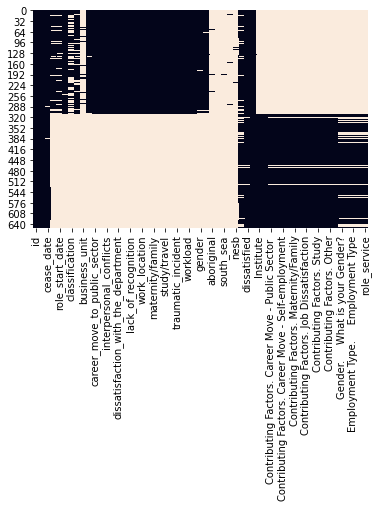

In [ ]:
import seaborn as sns
sns.heatmap(combined.isnull(), cbar=False)

Para conseguir analisar melhor vamos eliminar as colunas com muitos campos nulos, para definir o quanto siginifica "muitos", vamos utilizar o método ```notnull```e ele nos dará a noção para alimentar o parâmetro ```thresh```

In [ ]:
combined.notnull().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               308
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      307
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [ ]:
combined.shape

(651, 57)

In [ ]:
combined_clean = combined.dropna(axis=1, thresh=500).copy()
combined_clean.head()

,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,7,False,DETE
1,6,Resignation-Other reasons,2012.0,18,True,DETE
2,9,Resignation-Other reasons,2012.0,3,False,DETE
3,10,Resignation-Other employer,2012.0,15,True,DETE
4,12,Resignation-Move overseas/interstate,2012.0,3,False,DETE


Agora precisamos padronizar o tempo de serviço e para facilitar a análise classificar em:

* **New**: Menos de 3 anos de trabalho
* **Experienced**: 3-6 anos de trabalho
* **Established**: 7-10 anos de trabalho
* **Veteran**: 11 anos ou mais de trabalho


In [ ]:
combined_clean['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [ ]:
#para os valores com texto, vamos manter apenas um dígito correspondente a qtde de anos
combined_clean['institute_service'] = combined_clean['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')
combined_clean['institute_service'].value_counts().sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service, dtype: int64

In [ ]:
def classify_worktime(worktime):
  if pd.isnull(worktime):
    return np.nan
  elif worktime < 3:
    return 'New'
  elif worktime >= 3 and worktime <= 6:
    return 'Experienced'
  elif worktime >= 7 and worktime <= 10:
    return 'Established'
  elif worktime >= 11:
    return 'Veteran'

In [ ]:
combined_clean['service_cat'] = combined_clean['institute_service'].apply(classify_worktime) 
combined_clean[['service_cat','institute_service']].sample(5)

,service_cat,institute_service
295,Veteran,31.0
293,Veteran,20.0
245,NaN,NaN
424,Experienced,3.0
376,New,1.0


Antes de começar a analisar os dados, precisamos lidar com alguns valores nulos no campo dissatisfied. São poucos e talvez seja seguro substituir pelo valor False que é o mais comum dentre os valores.

In [ ]:
combined_clean['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
combined_clean['dissatisfied'] = combined_clean['dissatisfied'].fillna(False)
combined_clean['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

##Análise Inicial
Usando o ```pivot_table``` o método padrão é a média e interamente o python converte o ```True``` para 1 e ```False``` para 0, então automaticamente temos o percentual de insatisfação de funcionários por tempo de casa que deixaram o emprego.
Tanto a tabela abaixo quanto o gráfico já nos responde que a maior parte dos funcionários que saíram das instituições devido alguma insatisfação tinham maior tempo de casa.

In [ ]:
result = combined_clean.pivot_table('dissatisfied','service_cat', margins= True).sort_values(by='dissatisfied')
result

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
All,0.380107
Veteran,0.485294
Established,0.516129


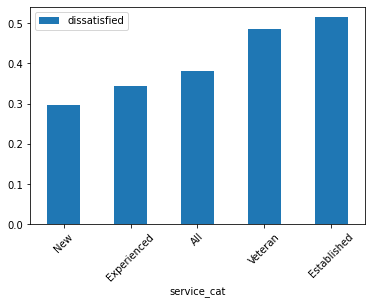

In [ ]:
import matplotlib.pyplot as plt

result.plot(kind='bar', rot=45);

#Considerações Finais

O Objetivo deste notebook foi colocar em prática técnicas aprendidas durante o curso para selecionar, limpar e combinar dados afim de extrair informações úteis e iniciar uma análise sob os dados.
Foi importante ter o objetivo definido desde o início para ter maior foco durante o tratamento dos dados.
Durante o notebook utilizamos as seguintes técnicas:

* Renomear colunas com nomes extensos
* Eliminar dados não necessários para atingir o objetivo
* Verificar a qualidade dos dados e possíveis inconsistências
* Lidar com valores nulos, eliminando ou substituindo por outros valores
* Criar colunas com informações importantes a partir de dados existentes
* Limpar colunas, padronizar valores, reclassificar valores
* combinar informações de forma equivalente, entre outras técnicas
